In [1]:
#Them cac thu vien
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import save_model

In [2]:
#Load du lieu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [3]:
# Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
print(y_train)
print(X_train[0].shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


[5 0 4 ... 8 4 8]
(28, 28)


In [4]:
# One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))
# Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\huuhi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),batch_size=32, epochs=10, verbose=1)
#Moi batch co 32 du lieu => co 1563 batch, 1 epoch phai xu ly het tat ca cac batch
#model.save('mnist_classification.h5')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.7741 - loss: 0.7217 - val_accuracy: 0.9807 - val_loss: 0.0717
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9818 - loss: 0.0625 - val_accuracy: 0.9848 - val_loss: 0.0556
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9877 - val_loss: 0.0434
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9937 - loss: 0.0233 - val_accuracy: 0.9870 - val_loss: 0.0453
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9964 - loss: 0.0148 - val_accuracy: 0.9874 - val_loss: 0.0407
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.9871 - val_loss: 0.0470
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accuracy: 0.9882 - val_loss: 0.0408
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9988 -

In [7]:
# Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03367898613214493, 0.9901999831199646]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Giá trị dự đoán:  7


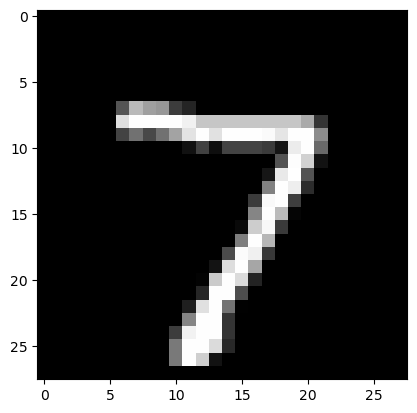

In [8]:
# Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))